#          Handwritten Digit Recognition using Multi-Layer Perceptron (MLP)

### Import Libraries 

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, f1_score

In [2]:
train_data = pd.read_csv('mnist_train.csv')
test_data = pd.read_csv('mnist_test.csv')


train_data

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to 28x28
dtypes: int64(785)
memory usage: 359.3 MB


### Preprocessing & Visualization 

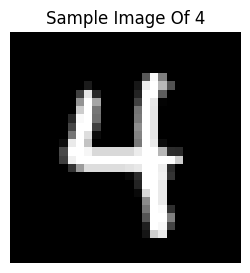

In [4]:
# plot a picture based on some row in `train_data`

sample_image = train_data.iloc[0, 1:].values.reshape(28, 28)
plt.figure(figsize=(3,3))
plt.imshow(sample_image, cmap='gray')
plt.title('Sample Image Of 4')
plt.axis('off')
plt.show()

In [5]:
X = train_data.drop(['label'],axis=1)
y = train_data['label']

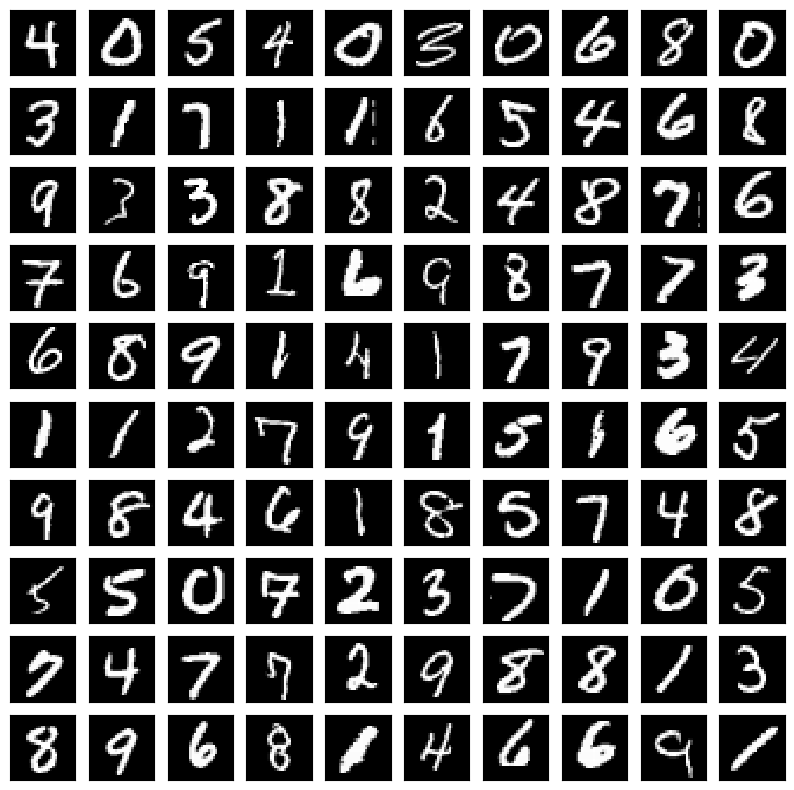

In [6]:

fig, axs = plt.subplots(10, 10, sharex=True, sharey=True, figsize=(10,10)) 
axs = axs.flatten()  # The ret
for i in range (0,100):
    sample_image = train_data.iloc[i, 1:].values.reshape(28, 28)
    axs[i].imshow(sample_image, cmap='gray',interpolation="None")
    axs[i].xaxis.set_visible(False)  # Hide the axes labels for clarity
    axs[i].yaxis.set_visible(False) 
plt.show()

### Scale Features 

In [7]:
X = X / 255

In [8]:

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

### Model Data With MLP

In [9]:
# modeling
model = MLPClassifier(alpha=0.3,hidden_layer_sizes=(110,130))
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [10]:
# evaluate model

print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))

F1 Score: 0.9753279942290076
